In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Downloading and saving the data from yfinance

In the code cell below I create a function called `get_data()`. The purpose of this function is to download, clean and save data for the five 'FAANG' stocks for the 5 day period directly preceding the day on which the code is run. The function does that by:

- Using the Panda library's Timestamp function to get the current date and time and then specifying exactly how that should be formatted with `.strftime('%Y%m%d-%H%M%S')` ([Reference](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior))
- Creating the file_path variable (where the FAANG data should be saved), and using f strings to make set the file name equal to the current_date_time variable value
- Using the yfinance library's `yf.download` function to download stock data for the five day period from the five FAANG stocks ([Reference](https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html))
- Saving this to a Pandas dataframe, and then importantly, creating a `pd.MultiIndex` object from this. I initially ran into indexing issues when attempting to go from a Dataframe to a CSV file. I researched multi indexing so that I could have the 'Close', 'Open', and 'Volume' headings as index objects above each of the stocks, to improve readability and also to instruct python to properly convert the data frame into a readable csv file ([Reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html))
- Finally I save the dataframe to a csv file using the specified file path, and subsequently return the file path. The reason I return the file path, and then set it equal to the function when I call it (`file_path = get_data()`), is as this both runs the function and stores the file path for use in the next function that I will be using.




In [3]:
def get_data():
        # getting the current date and time to use in the file name
        current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S')
        file_path = f'C:/Users/fmtie/OneDrive/Desktop/comp-infrastructure/data/{current_date_time}.csv'
        # here I specify the tickers of each company as arguments in a single string, and specify the period to be the past 5 days as another argument
        faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d")
        # converting data to a dataframe
        faang_stock_data_frame = pd.DataFrame(faang_stock_data_past_5_days)
        # setting multi-index for better organization
        pd.MultiIndex.from_frame(faang_stock_data_frame)
        faang_stock_data_frame.to_csv(file_path)
        # returning updated file path for use in another function to be called later
        return file_path

# running the function while saving the returned file path for use in later function
file_path = get_data()


C:\Users\fmtie\AppData\Local\Temp\ipykernel_23488\4212487768.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d")
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting the data

In the code cell below, I write a function called plot_data(). The purpose of this function is to open the file most recently saved csv file through the previously defined `get_data()` function, and plot the close prices for each of the five stocks. It does this by:

- Getting the current date and time (for the plot title), using the `Pandas.Timestamp` function again ([Reference](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior))
- Opening the csv file using `pd.read_csv` and storing it as a dataframe. Because it was multiindexed when saved as a csv file, it is important to account for that when opening the file as a dataframe by specifying that the first two rows are header rows, simply by using the `header=` argument and passing a list to it `[0,1]` to mark the first two rows as headers.
- The function then creates a new variable 'closes' from the Close data in the dataframe, and takes the column names from this new variable and stores each under the variable 'tickers' for use in the plot legend.
- It then creates a figure, or plot area, using the matplotlib library's `plt.figure` function, specifying the size of the plot area using the `figsize=` argument.
- Finally it create a plot 'ax1', using the `fig.add_subplot` function 

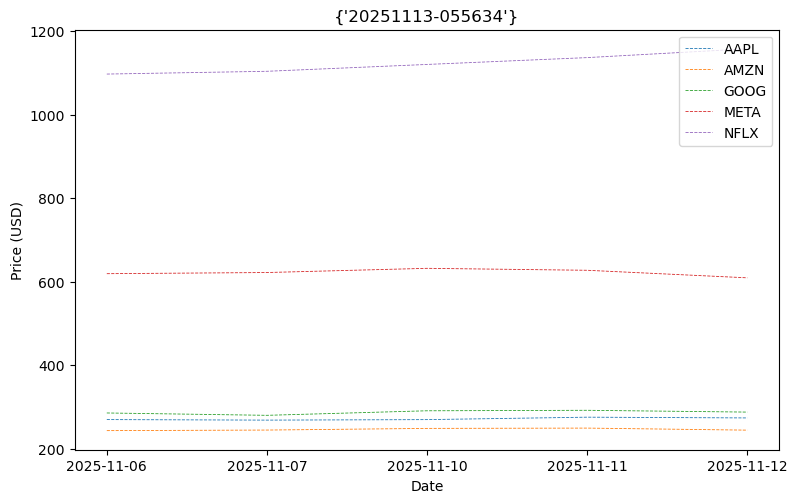

In [4]:
#df = pd.read_csv(file_path, index_col=0, header=[0,1])
#print(df)
#closes = df['Close']
#print(closes.columns)


# reading in the csv file specifying the two header rows (as I initially made this a multi-index dataframe)
# then creating a figure and subplots
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
def plot_data():
    current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S')
    faang_df = pd.read_csv(file_path, index_col=0, header=[0,1])
    closes = faang_df['Close']
    tickers = closes.columns
    fig = plt.figure(figsize=(20, 12))
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_title({current_date_time})
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.plot(closes[tickers], lw=0.6, ls='--')
    ax1.legend(tickers)

plot_data()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# As per documentation, if format argument is not set, it is inferred from file extension (.png)
plt.savefig(r'C:\Users\fmtie\OneDrive\Desktop\comp-infrastructure\plots\{current_date_time}.png')


Making script runnable from cmder

link to copilot conversation: https://copilot.microsoft.com/shares/SXeejgA1NPiz9vFGgNf5h

I wrote my script in vs code on my computer, and I push changes to github using cmder, so I wanted to find a way that I could make my faang.py file executable from cmder.

I followed the steps outlined in the above referenced copilot conversation.

I have added a shebang line to the faang.py script, and added the folder in which the faang.py script sits directly to my system's path, so that I can type 'faang.py' directly into the GitBash terminal on my computer to run it, but I am getting the below error at present:

bash: /c/Users/fmtie/OneDrive/Desktop/comp-infrastructure/faang.py: cannot execute: required file not found
